In [211]:
import numpy as np
import matplotlib.pyplot as plt

In [212]:
data_log = np.loadtxt('p.02.txt', dtype=float, delimiter=', ', skiprows=4, ndmin=2)
print(data_log[0])

ValueError: Wrong number of columns at line 14364

In [198]:
# determine length
l=len(data_log[:,0])
print(l)

18315


In [199]:
# clip data
clip_data=data_log[8000:16000,:]

In [200]:
status = clip_data[:,0]
rpm = clip_data[:,1]
act_vel = clip_data[:,2]
enc_pos = clip_data[:,3]
full_in = clip_data[:,4]
full_out = clip_data[:,5]
control_start = clip_data[:,6]
control_stop = clip_data[:,7]
odrive_voltage = clip_data[:,8]
odrive_current = clip_data[:,9]
cooling_temp = clip_data[:,10]

print("everything is fine")

everything is fine


In [201]:
# status = []
# rpm = []
# act_vel = []
# enc_pos = []
# full_in = []
# full_out = []
# control_start = []
# control_stop = []
# odrive_voltage = []
# odrive_current = []
# cooling_temp = []

In [202]:
# for i in range(len(clip_data-1)): # number of rows
#     status[i] = clip_data[i][0]
#     rpm[i] = clip_data[i][1]
#     act_vel[i] = clip_data[i][2]
#     enc_pos[i] = clip_data[i][3]
#     full_in[i] = clip_data[i][4]
#     full_out[i] = data_log[i][5]
#     control_start[i] = data_log[i][6]
#     control_stop[i] = data_log[i][7]
#     odrive_voltage[i] = data_log[i][8]
#     odrive_current[i] = data_log[i][9]
#     cooling_temp[i] = data_log[i][10]

[ 3.0000e+00  9.0000e+00  1.0000e+01 ... -3.4466e+04 -3.4465e+04
 -3.4464e+04]


Text(0, 0.5, 'Encoder pos (ticks)')

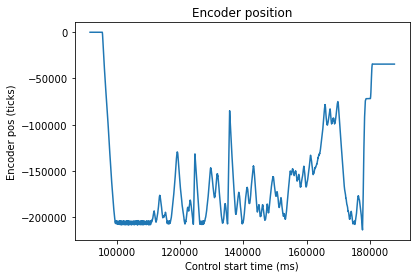

In [203]:
# #Array of graphs
# row_num = 2
# col_num = 3

# plt.subplot(row_num, col_num, 1) 
plt.plot(control_start, enc_pos)
print(enc_pos)
plt.title("Encoder position")
plt.xlabel('Control start time (ms)')
plt.ylabel('Encoder pos (ticks)')


Text(0, 0.5, 'Motor RPM (rot/min)')

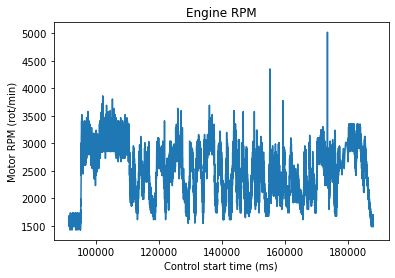

In [204]:

#plt.subplot(row_num, col_num, 4) 
plt.plot(control_start, rpm)
plt.title("Engine RPM")
plt.xlabel('Control start time (ms)')
plt.ylabel('Motor RPM (rot/min)')


Text(0, 0.5, 'Actuator velocity (m/s)')

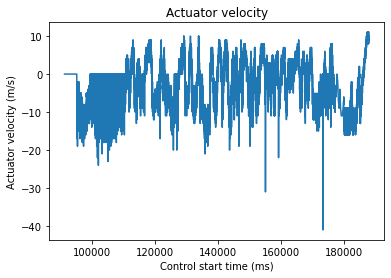

In [205]:

# plt.subplot(row_num, col_num, 5) 
plt.plot(control_start, act_vel)
plt.title("Actuator velocity")
plt.xlabel('Control start time (ms)')
plt.ylabel('Actuator velocity (m/s)')


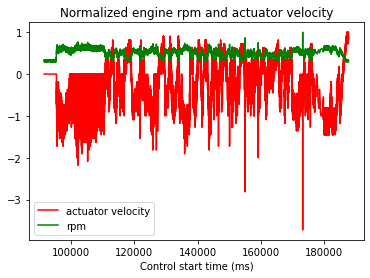

In [206]:
# notmalize actuator velocity and engine rpm to plot on same graph

n_act_vel=act_vel/max(act_vel)
n_rpm=rpm/max(rpm)
plt.plot(control_start, n_act_vel, color='r', label='actuator velocity')
plt.plot(control_start, n_rpm, color='g', label='rpm')
plt.title("Normalized engine rpm and actuator velocity")
plt.xlabel('Control start time (ms)')
plt.legend()

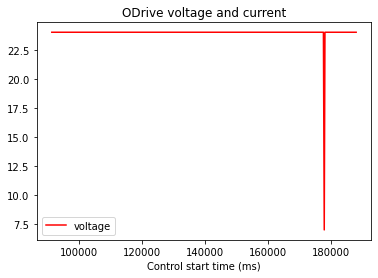

In [207]:

#Plot on top of each other
#plt.subplot(row_num, col_num, 2) 
plt.plot(control_start, odrive_voltage, color='r', label='voltage')
# plt.plot(control_start, odrive_current, color='g', label='current')
plt.title("ODrive voltage and current")
plt.xlabel('Control start time (ms)')
plt.legend()


Text(0, 0.5, 'Cooling temperature (deg C)')

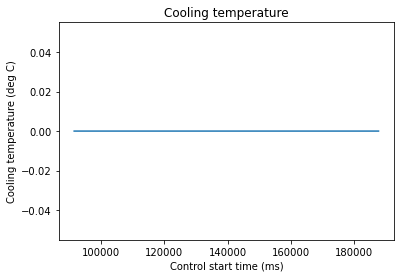

In [208]:

# plt.subplot(row_num, col_num, 6) 
plt.plot(control_start, cooling_temp)
plt.title("Cooling temperature")
plt.xlabel('Control start time (ms)')
plt.ylabel('Cooling temperature (deg C)')



In [209]:
plt.plot(control_start, (control_stop - control_start)) #ensure consistency in control loop run times
could use subplot2grid once we know the plot sizes we want
encoder pos vs time
voltage and current vs time
rpm and actuator vel over time
cooling temp vs time
control start and control stop
2700 rpm 
negative vel is inbound

SyntaxError: invalid syntax (<ipython-input-209-8006538ec0ef>, line 2)

In [ ]:
print("everything is fine")

In [ ]:
plt.suptitle("Data Log <Log File Name>")
plt.show()